## Imputing Missing Values

Imputing Missing Values by using the SimpleImputer.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Objective

Our aim to impute the missing values in our dataset to increase the performance of any estimator. In this section we will work on the `Life Expectancy` updated dataset which do not have any missing values so first we will load the data set then we will create fake `np.nan` values. 

In [3]:
# loading the Life expectancy dataset.
df = pd.read_csv("../datasets/Life-Expectancy-Data-Updated.csv")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


### Basic information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In Summary:

we have total `2864` entries and `21` columns, we don't found any non-value. 

* expect `country` and `year` columns all values are numerical.

### Descriptive stats

In [5]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


### Missing Values

From basic info we already know that this dataset has no missing values values.

In [6]:
df.isna().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

### Adding Missing Values randomly into over dataset.

first we will do each step separately then we will combine them into a function.

To create dataset with some `np.nan` values (randomly placed) we follow these following steps:

1. first we will separate the dataset into the x_data and y_data
2. we will choose the y_data as the `Life Expectancy` and `x_data` as the remaining variables.
3. split data into the train and test.
4. extract the number of entries and features.
5. decide the how many missing values we will put.
6. create a random binary sample with n_entries and put some `True` values equal to the missing values.
7. Now we need one another sample of random number in b/w the `0` and `n_features`. 
8. Generate the missing sample.  

In [7]:
# first we will separate the sample.
y_data = df["Life_expectancy"]

# in our x_data we will remove the Country, Region Year and Life_Expectancy columns.
x_data = df.drop(axis=1, columns=["Country","Region", "Year", "Life_expectancy"])

In [8]:
# Now testing our x_data shape
x_data.shape

(2864, 17)

In [9]:
# splitting the data into train and test dataset.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30)

Now we will have train and test data set we need to only focus on the train dataset so from now we will  use the train dataset to create a new dataset with `np.nan` values.

### Adding Missing Values

In [10]:
# to add missing values first we need to extract the number of entries and features from the xtrain dataset.
n_sample, n_features = x_train.shape
print("Total number of samples: ", n_sample)
print("Total number of featrues: ", n_features)

Total number of samples:  2004
Total number of featrues:  17


In [11]:
# missing value rate
missing_rate = 0.30  # new dataset will have 30% missing values.

In [12]:
# Now compute the number of sample to have the missing values.
n_missing_number = int(n_sample * missing_rate)
print("Total number of missing Values will be: ", n_missing_number)

Total number of missing Values will be:  601


**sample of binary values for missing value**

In [13]:
# Now creating a sample of binary values 
n_missing_sample = np.zeros(n_sample, dtype=bool)

# now we will put some True we equal to the n_missing_number to our binary sample.
n_missing_sample[:n_missing_number] = True

# Now shuffle the data to distribute the True values to the whose sample equally.
np.random.shuffle(n_missing_sample)

# our new sample
print(n_missing_sample)

[False False False ...  True False False]


In [14]:
# we also need one more random sample to select the feature to put the random value.
n_missing_featrue = np.random.randint(0,n_features, n_missing_number) 

In [15]:
n_missing_featrue

array([ 6, 15,  6,  2, 10, 16, 13,  0, 12,  4,  4,  2,  0, 12, 16,  3, 10,
       10,  3, 11,  2,  4, 14,  5, 12, 16,  4,  3,  4,  2, 14, 14,  2, 16,
        8,  1,  4, 14,  8,  7,  7,  6,  6, 13, 14, 11, 16,  8,  9, 12, 13,
       15,  5,  7, 13,  1, 14,  4,  9,  3,  8,  3, 13,  3,  7,  9, 13,  7,
        7,  5, 15, 14,  4, 16,  8,  5, 10, 10,  9,  8, 12, 13, 12, 11, 13,
        0, 13, 10, 14, 15,  3,  2,  9,  5,  4,  9, 15,  8, 13, 15,  1,  0,
        6,  2,  9,  8, 13,  3,  7,  9, 12, 11, 13,  8, 11,  6,  3, 11,  5,
       10, 11,  4,  9,  6,  3,  4,  8,  7,  7,  5, 14,  9,  8,  3,  9,  7,
        9,  7,  9,  3,  4,  0,  9,  9,  2,  1,  7, 15,  4, 14,  7,  8,  3,
        9,  0, 11, 16,  1,  4, 16,  2,  6, 14,  8, 13,  1, 12,  7, 10,  0,
        3, 10,  5,  4, 11,  6, 15,  2,  9, 13,  8, 15, 10, 15, 16,  5,  7,
       14,  6,  0,  5,  4,  0,  0, 15, 13,  4,  9, 10,  4,  5,  6,  9, 15,
       11,  4, 11,  1,  9, 10,  5, 16,  9,  5,  0,  4,  9, 12,  4, 13,  8,
        7, 13,  4,  0,  6

In [16]:
# creating a copy to the data set
x_train_copy = x_train.copy()
y_train_copy = y_train.copy()

In [17]:
# we need to inspect the shape of the x_train_copy and (n_missing_sample, n_missing_feature)
print("x_train_copy shape: ", x_train_copy.shape)
print("n_missing_sample shape: ", n_missing_sample.shape)
print("n_missing_fetaure shape: ", n_missing_featrue.shape)

x_train_copy shape:  (2004, 17)
n_missing_sample shape:  (2004,)
n_missing_fetaure shape:  (601,)


Since our shape is matching with n_samples we are good to go.

Now we will select all those sample who are marked for `np.nan` values and then form those we will select the `featrue` in which we want to put the `np.nan` value.

In [18]:
np_x_train_data = x_train_copy.to_numpy()

In [19]:
np_x_train_data[n_missing_sample, n_missing_featrue] = np.nan

In [20]:
x_train_data = pd.DataFrame(np_x_train_data, columns=x_train_copy.columns)

In [21]:
x_train_data.isna().sum()

Infant_deaths                  42
Under_five_deaths              31
Adult_mortality                29
Alcohol_consumption            34
Hepatitis_B                    44
Measles                        38
BMI                            22
Polio                          40
Diphtheria                     42
Incidents_HIV                  45
GDP_per_capita                 34
Population_mln                 31
Thinness_ten_nineteen_years    33
Thinness_five_nine_years       31
Schooling                      34
Economy_status_Developed       36
Economy_status_Developing      35
dtype: int64

## Getting Together

In [22]:
def add_missing_value(x_data,y_data, missing_rate=.30):
    """Create artificial missing values in a dataset.

    This function randomly selects n% of the samples and replaces one feature value with np.nan for each sample. 
    The output vector is not modified.

    Parameters
    ----------
    X_data : array-like of shape (n_samples, n_features)
        The input data matrix with all the features.
    y_data : array-like of shape (n_samples,)
        The output vector with the target values.
    missing_rate: a float value to set the total number of missing values to add in the
        dataset.

    Returns
    -------
    x_missing : array-like of shape (n_samples, n_features)
        The modified data matrix with missing values.
    y_missing : array-like of shape (n_samples,)
        The original output vector.
    
    """
    # extracting the numbr of samples and the features.
    n_samples, n_features = x_data.shape
    
    # caluate the n_missing_number
    n_missing_number = int(missing_rate * n_samples)
    
    # Now create a binary array equal to the n_samples size.
    n_missing_samples = np.zeros(n_samples, dtype=bool)
    
    # Now put some True values on the samples equal to the n_missing_number
    n_missing_samples[:n_missing_number] = True
    
    # now shuffle the n_missing_samples to distribute the missing value equally 
    # through out the dataset.
    np.random.shuffle(n_missing_samples)
    
    # creating another n_feature_samples to select the featrue.
    n_missing_features = np.random.randint(0, n_features, n_missing_number)
    
    # Now we will create a copy of the original data and transform the copy
    x_missing = x_data.copy()
    y_missing = y_data.copy()
    
    # putting some missing values.
    x_missing[n_missing_samples, n_missing_features] = np.nan
    
    return x_missing, y_missing

In [35]:
# adding missing values.
x_miss_data, y_miss_data = add_missing_value(x_train.to_numpy(), y_train.to_numpy(), 0.80)

In [36]:
# again creating the dataframe with new values
new_data = pd.DataFrame(x_miss_data, columns=x_train.columns)

In [37]:
# displaying the total number of nan values in each feature
new_data.isna().sum()

Infant_deaths                   92
Under_five_deaths              101
Adult_mortality                101
Alcohol_consumption             79
Hepatitis_B                     99
Measles                         97
BMI                             85
Polio                           84
Diphtheria                      80
Incidents_HIV                   99
GDP_per_capita                 101
Population_mln                  83
Thinness_ten_nineteen_years    103
Thinness_five_nine_years       104
Schooling                       94
Economy_status_Developed        85
Economy_status_Developing      116
dtype: int64

**Imputing the data**

In [38]:
# creating a SimpleImputer to replace all the missing value with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train_imputted =imputer.fit_transform(x_miss_data)

In [39]:
# again creating the dataframe with new values
new_data = pd.DataFrame(x_train_imputted, columns=x_train.columns)
new_data.isna().sum()

Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
dtype: int64

As we can see that after imputing the data, we don't have any `np.nan` values in the train dataset. Now we will perform the `RandomForestRegressor` by using both the `Imputted` and `non-Imputted` dataset.

## Regression with Original data.

In [40]:
# first create a LinearRegression instance
regressor = RandomForestRegressor()

# here x_train and y_train are the original data.
regressor.fit(x_train, y_train)

# now perform the cross validation on the regressor
score = cross_val_score(regressor, x_train, y_train, scoring="neg_mean_squared_error", cv=4)

In [41]:
print("score mean: %.2f"% (score.mean()))
print("score standard deviation: ", score.std())

score mean: -0.50
score standard deviation:  0.07114517779926102


## Regression with imputted data

In [42]:
# regression with imputted data
regressor = RandomForestRegressor()
score = cross_val_score(regressor, x_train_imputted, y_train, scoring="neg_mean_squared_error", cv=5)
print(f"score mean: {score.mean():.2f}")
print("score standard deviation: ", score.std())

score mean: -1.24
score standard deviation:  0.22629415739355224


As we can see that, we have very less `MSE` on the original data but after creating dummy `nan` values and imputing them we have increased the `MSE`.

Now we will test this on multiple Simputer and test their score.

1. imputing constant value with 0. (SimpleImputer)
2. imputing mean with SimpleImputer.
3. KNN-Imputation
4. IterativeImputation

In [66]:
# Now we will impute the data by defining a generic function
def impute_data(imputer, estimator, x_data, y_data):
    
    # imputting the data
    x_imputed_data = imputer.fit_transform(x_data)
    
    # perporming the corss validation score test.
    impute_score = cross_val_score(estimator, x_imputed_data, y_data, scoring="neg_mean_squared_error", cv=4)
    r2_score = cross_val_score(estimator, x_imputed_data, y_data, scoring="r2", cv=2)
    
    return (impute_score.mean(), impute_score.std()), (r2_score.mean(), r2_score.std())


Now we need to create 4 imputers for each test.

In [67]:
simple_zero_imputer = SimpleImputer(missing_values=np.nan, add_indicator=True, strategy="constant", fill_value=0)
simple_mean_imputer = SimpleImputer(missing_values=np.nan, add_indicator=True, strategy="mean")
knn_imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
iterative_imputer = IterativeImputer(missing_values=np.nan, max_iter=5, random_state=0, add_indicator=True , 
                                     sample_posterior=True)

imputers = {"simple_zero_imputer":simple_zero_imputer, "simple_mean_imputer":simple_mean_imputer, 
            "knn_imputer":knn_imputer, "iterative_imputer":iterative_imputer}

Now we will perform the test for each imputer.

In [68]:
mse_score = np.zeros(4)
std_score = np.zeros(4)
r2_score = np.zeros(4)
r2_std_score = np.zeros(4)

estimator = RandomForestRegressor()
for i, (imputer_name, imputer) in enumerate(imputers.items()):
    
    (mse_mean, mse_std),(r2_mean, r2_std) = impute_data(imputer, estimator, x_miss_data, y_miss_data)
    mse_score[i] = mse_mean
    std_score[i] = mse_std
    r2_score[i] = r2_mean
    r2_std_score[i] = r2_std
    
    print(f"Test for {imputer_name} completed..", i)

Test for simple_zero_imputer completed.. 0
Test for simple_mean_imputer completed.. 1
Test for knn_imputer completed.. 2
Test for iterative_imputer completed.. 3


In [69]:
print("score keys: ", imputer_names)
print("mse score: ", mse_score)
print("std score: ", std_score)
print("r2 score: ", r2_score)
print("r2 score std: ", r2_std_score)

score keys:  ['simple_zero_imputer', 'simple_mean_imputer', 'knn_imputer', 'iterative_imputer']
mse score:  [-1.24300758 -1.2592767  -0.96627848 -1.06914786]
std score:  [0.09794087 0.2135167  0.150299   0.17399555]
r2 score:  [0.98146154 0.98216535 0.98657236 0.98539636]
r2 score std:  [0.00090946 0.00193681 0.00019484 0.0010841 ]


Now we will plot the plot to visualize the data.

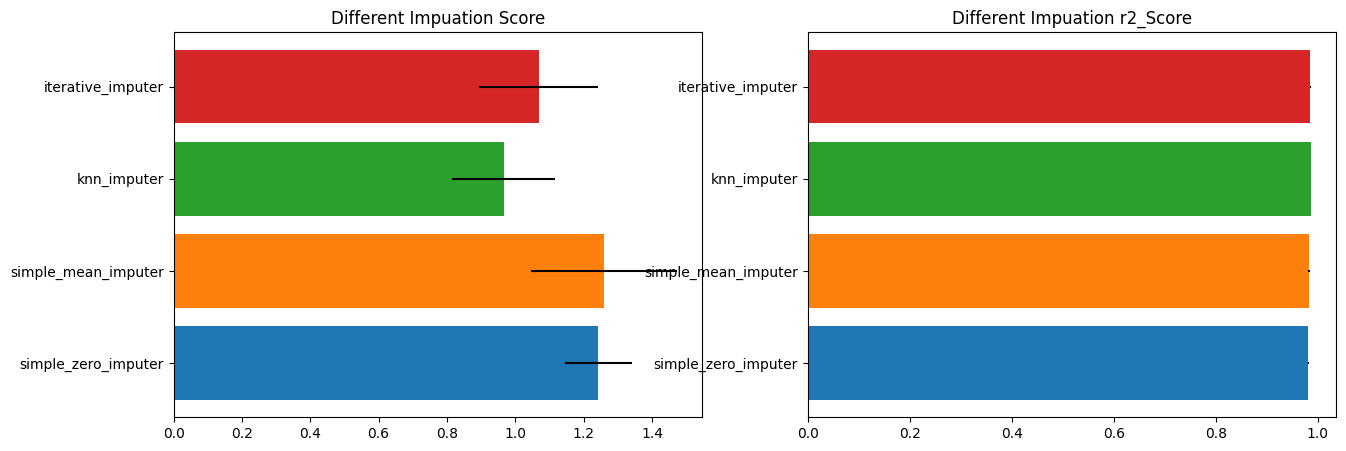

In [74]:
imputer_names = list(imputers.keys())

fig, (axes1, axes2) = plt.subplots(figsize=(15,5), ncols=2)

for i, impute_name in enumerate(imputer_names):
    
    axes1.barh(i, mse_score[i]*-1, xerr=std_score[i])

    
axes1.set_title("Different Impuation Score")
axes1.set_yticks(np.arange(len(imputer_names)))
axes1.set_yticklabels(imputer_names)


for i, impute_name in enumerate(imputer_names):
    
    axes2.barh(i, r2_score[i], xerr=r2_std_score[i])

    
axes2.set_title("Different Impuation r2_Score")
axes2.set_yticks(np.arange(len(imputer_names)))
axes2.set_yticklabels(imputer_names)

plt.show()